# Aaditya Deshmukh (Mobile Price Range Prediction)
- IMS Proschool Pune.
- LinkedIn ID- https://www.linkedin.com/in/aaditya-deshmukh-50174a1a3
- Github URL - https://github.com/Aaditya28-D/Projects-2020

### Modelling
1. Logistic Regression
2. KNN Classifier
3. DecisionTree Classifier
4. RandomForest Classifier

### Loading all requlred packages

In [1]:
import pandas as pd
import numpy as np
import os as os

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
from scipy.stats import chi2_contingency 

import warnings as warnings 
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:\Users\Aaditya Deshmukh\Desktop\IMS\1. PGD Data Science\1. Bussiness Analytics\7. Logistic Regression\4. LVC 2\Moblie data [Assignment LR+KNN+DC+RC (14-06-20)]\Mob_train.csv')

### A)  EDA

In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [293]:
data.shape
#to check for the shape of the dataset

(2000, 21)

In [294]:
data.isnull().sum()
#no null value found 

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [295]:
data.info()
#check for the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [296]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [297]:
#geting the column list in the data
list(data.columns.values)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [298]:
#changing the sequence of the columns in the dataset
data=data[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','blue','dual_sim','three_g','four_g','touch_screen','wifi','price_range']]

In [299]:
data.nunique()
#'blue','dual_sim','three_g','four_g','touch_screen','wifi' are the catagorical var, present in the binary form in the data

battery_power    1094
clock_speed        26
fc                 20
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
blue                2
dual_sim            2
three_g             2
four_g              2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### Analyzing features with the help of Anova test, chi square test, and RFC feature importance for prediction
**1. Anova test (with all independent continuous variable)**

In [300]:
#Anova test (used for understanding the significance of relation between the continuous var and categorical var)
#when more than two groups are present..other wise we can use t test too
#we have 4 groups in our case with diff var
#ho:mean of the two groups is same (ind variable is less helpfull in prediction of dep. var)
#ha:mean of two group is different (ind variable is helpfull in prediction of dep. var)
#if pvalue is greater than 0.05 accept the null hypthesis[ho]... else reject it and accept alternative hypothesis [ha]

#Anova applied on total dataset
col=['battery_power', 'clock_speed','fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

for x in col:
    fvalue, pvalue=stats.f_oneway(data[data['price_range']==0][x], data[data['price_range']==1][x], data[data['price_range']==2][x], data[data['price_range']==3][x])
    if pvalue<0.05:
        print(x,' =', pvalue)

        
#will get list of only those continuous variable, which have considerable relation wiht dep var (price_range)

battery_power  = 5.948688277085545e-20
int_memory  = 0.03277693883277447
mobile_wt  = 0.013117390712873744
n_cores  = 0.04893585053336053
px_height  = 1.8860848027538453e-12
px_width  = 2.1169108878354858e-14
ram  = 0.0


**2. chi square test(with all independent catagorical variable)**

In [301]:
#Chi square test (used for understanding the significance of relation between the categorical var and categorical var)
##ho:thier is no relation between two cat. variables (ind variable is less helpfull in prediction of dep. var)
#ha:thier is relation between two cat. variables (ind variable is helpfull in prediction of dep. var)
#if pvalue is greater than 0.05 accept the null hypthesis[ho]... else reject it and accept alternative hypothesis [ha]


col=['blue', 'dual_sim', 'three_g', 'four_g', 'touch_screen', 'wifi']

for x in col:
    table=pd.pivot_table(data, columns='price_range', index=x, aggfunc='count', values='battery_power')
    stat, p, dof, expected = chi2_contingency(table)
    print(x+' =', p)
    
#from the result we can understand that none of them have any significant importance in the prediction of dep var(price_range)
#its better to drop them

blue = 0.6980177809451273
dual_sim = 0.7323497176264594
three_g = 0.7116958581372179
four_g = 0.36471408196943356
touch_screen = 0.27470114180281896
wifi = 0.8359905195342198


**3. RFC feature importance (with all independent variable)**

In [302]:
x=data.drop(['price_range'], axis=1)
y=data['price_range']

x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

rc=RandomForestClassifier()
rc.fit(x_train, y_train)
y = rc.feature_importances_

In [303]:
col=data.drop(['price_range'], axis=1).columns.tolist()
feature_imp_table={
    'feature_name':col, 'feature_importance':y
}

In [304]:
feature_imp_table_1=pd.DataFrame(feature_imp_table)
feature_imp_table_1.sort_values(['feature_importance'], ascending=False, inplace=True)
feature_imp_table_1['feature_importance']=feature_imp_table_1['feature_importance']*100
feature_imp_table_1

,feature_name,feature_importance
10,ram,47.328944
0,battery_power,7.301794
8,px_height,5.953815
9,px_width,5.723202
5,mobile_wt,4.284942
3,int_memory,3.673793
7,pc,2.933420
13,talk_time,2.837852
1,clock_speed,2.810539
12,sc_w,2.803066


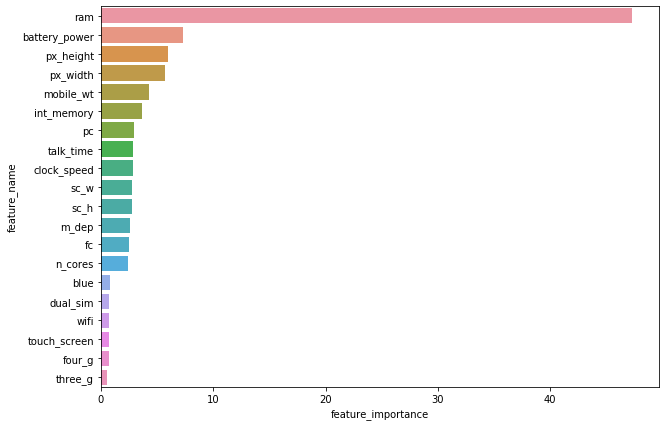

In [305]:
axes=plt.subplots(figsize=(10,7))
sns.barplot(x=feature_imp_table_1['feature_importance'], y=feature_imp_table_1['feature_name'])

In [306]:
#making data copy
data_1=data.copy()

In [307]:
#droping those columns from the data_1 which we found useless with the help chi square test & RFC feature importance in above cell
data_1=data_1.drop(['blue', 'dual_sim', 'three_g', 'four_g', 'touch_screen', 'wifi'], axis=1)

In [308]:
data_1.nunique()
#('clock_speed','fc','m_dep','n_cores','pc','sc_h','sc_w','talk_time') have very less number of unique values in total 2000 rows
# lets check if they are treated as cat var ..will it make any difference in their significance 

battery_power    1094
clock_speed        26
fc                 20
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
price_range         4
dtype: int64

In [309]:
#creating new data set which contains variable having very less unique values and checking if they could be treated as categorical variable
data_2=data_1[['clock_speed','fc','m_dep','n_cores','pc','sc_h','sc_w','talk_time','price_range']]
data_2.shape

(2000, 9)

In [310]:
data_2_num=data_2['price_range']
data_2_num.shape

(2000,)

In [311]:
data_2_cat=data_2.drop(['price_range'], axis=1)
data_2_cat.shape

(2000, 8)

In [312]:
data_2_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   clock_speed  2000 non-null   float64
 1   fc           2000 non-null   int64  
 2   m_dep        2000 non-null   float64
 3   n_cores      2000 non-null   int64  
 4   pc           2000 non-null   int64  
 5   sc_h         2000 non-null   int64  
 6   sc_w         2000 non-null   int64  
 7   talk_time    2000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 125.1 KB


In [313]:
#converting datatype from int, float to object
data_2_cat[['clock_speed','fc','m_dep','n_cores','pc','sc_h','sc_w','talk_time']]=data_2_cat[['clock_speed','fc','m_dep','n_cores','pc','sc_h','sc_w','talk_time']].astype('object')

In [314]:
data_2_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clock_speed  2000 non-null   object
 1   fc           2000 non-null   object
 2   m_dep        2000 non-null   object
 3   n_cores      2000 non-null   object
 4   pc           2000 non-null   object
 5   sc_h         2000 non-null   object
 6   sc_w         2000 non-null   object
 7   talk_time    2000 non-null   object
dtypes: object(8)
memory usage: 125.1+ KB


In [315]:
#creating dummies
data_2_cat_dummies=pd.get_dummies(data_2_cat, drop_first=False)

In [316]:
data_2_cat_dummies.shape

(2000, 138)

In [317]:
#data_2_cat_dummies.columns.tolist()

In [318]:
data_3=pd.concat([data_2_cat_dummies, data_2_num], axis=1)

In [319]:
data_3.shape

(2000, 139)

In [320]:
data_3['battery_power']=data['battery_power']

**4. chi square test (with independent variable converted from continuous to catagorical)**

In [321]:
#Chi square test (used for understanding the significance of relation between the categorical var and categorical var)
##ho:thier is no relation between two cat. variables (ind variable is less helpfull in prediction of dep. var)
#ha:thier is relation between two cat. variables (ind variable is helpfull in prediction of dep. var)
#if pvalue is greater than 0.05 accept the null hypthesis[ho]... else reject it and accept alternative hypothesis [ha]

col=data_3.drop(['price_range', 'battery_power'], axis=1).columns.tolist()

for x in col:
    table=pd.pivot_table(data_3, columns='price_range', index=x, aggfunc='count', values='battery_power')
    stat, p, dof, expected = chi2_contingency(table)
    if p<0.05:
        print(x+' =', p)
        
#will get list of only those categorical variable, which have considerable relation wiht dep var (price_range)
#out of 138 newly created cat dummies only 8 have significant relation with dep var ...according to chi square test

clock_speed_1.3 = 0.036318175341955757
fc_10 = 0.035287797212285414
n_cores_1 = 0.03289591382637127
pc_16 = 0.016404623325490832
sc_w_7 = 0.02903232850041282
sc_w_11 = 0.0022824034736747137
sc_w_16 = 0.028472131043610252


#### 5.  lets check if the above 7 newly created binary variable are significant for prediction with the help of RFC feature importance...

In [322]:
data_4=data_1.drop(['clock_speed','fc','m_dep','pc','sc_h','sc_w','talk_time', 'n_cores'],axis=1)

In [323]:
data_4.columns

Index(['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width',
       'ram', 'price_range'],
      dtype='object')

In [324]:
data_5=data_3[['clock_speed_1.3', 'fc_10','n_cores_1',  'pc_16', 'sc_w_7', 'sc_w_11', 'sc_w_16']]

In [325]:
data_5.shape

(2000, 7)

In [326]:
data_6=pd.concat([data_4, data_5], axis=1)

In [327]:
data_6.columns

Index(['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width',
       'ram', 'price_range', 'clock_speed_1.3', 'fc_10', 'n_cores_1', 'pc_16',
       'sc_w_7', 'sc_w_11', 'sc_w_16'],
      dtype='object')

In [328]:
data_6=data_6[['battery_power', 'int_memory', 'mobile_wt', 'px_height','px_width', 'ram', 'clock_speed_1.3', 'fc_10', 'n_cores_1','pc_16','sc_w_7', 'sc_w_11', 'sc_w_16','price_range']]

In [329]:
data_6.nunique()

battery_power      1094
int_memory           63
mobile_wt           121
px_height          1137
px_width           1109
ram                1562
clock_speed_1.3       2
fc_10                 2
n_cores_1             2
pc_16                 2
sc_w_7                2
sc_w_11               2
sc_w_16               2
price_range           4
dtype: int64

In [330]:
x=data_6.drop(['price_range'], axis=1)
y=data_6[['price_range']]

x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.8, random_state=100)

rc=RandomForestClassifier()
rc.fit(x_train, y_train)
y=rc.feature_importances_

In [331]:
feature_importance={
    'feature_name':data_6.drop(['price_range'], axis=1).columns.tolist(), 'feature_importance':y
}

In [332]:
feature_imp_table_2=pd.DataFrame(feature_importance)
feature_imp_table_2['feature_importance']=feature_imp_table_2['feature_importance']*100
feature_imp_table_2.sort_values(['feature_importance'], ascending=False, inplace=True)
feature_imp_table_2

,feature_name,feature_importance
5,ram,58.803306
0,battery_power,10.397128
3,px_height,8.517106
4,px_width,7.998409
2,mobile_wt,5.683464
1,int_memory,5.281562
8,n_cores_1,0.794598
10,sc_w_7,0.554684
11,sc_w_11,0.544182
9,pc_16,0.444987


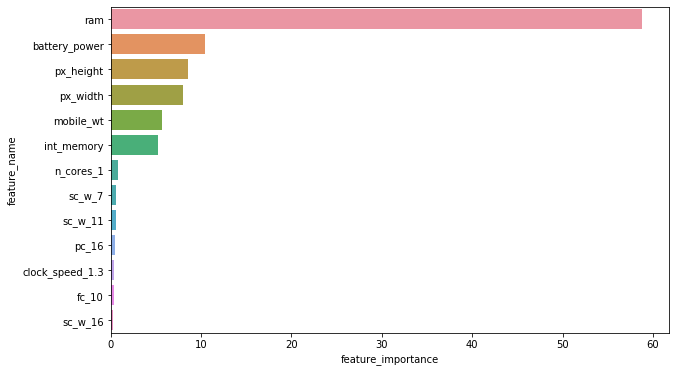

In [333]:
axes=plt.subplots(figsize=(10,6))
sns.barplot(x='feature_importance', y='feature_name', data=feature_imp_table_2)

#### newly converted 7 categorical variable which were significant according to the chi square test ...are not much considerable according to RFC featrue importance.. so we will not include them in model builidng.

In [334]:
# imp_data containing the important independent feature only 
imp_data=data_6[['battery_power','int_memory','mobile_wt','px_height','px_width','ram','price_range']]

In [335]:
imp_data.head()

,battery_power,int_memory,mobile_wt,px_height,px_width,ram,price_range
0,842,7,188,20,756,2549,1
1,1021,53,136,905,1988,2631,2
2,563,41,145,1263,1716,2603,2
3,615,10,131,1216,1786,2769,2
4,1821,44,141,1208,1212,1411,1


#### visualizing the data

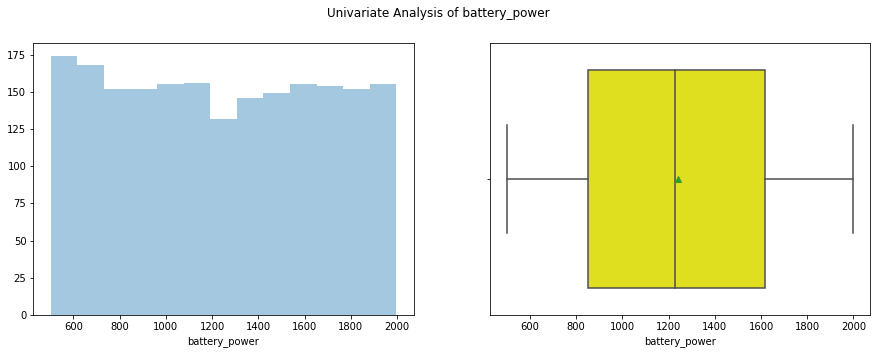

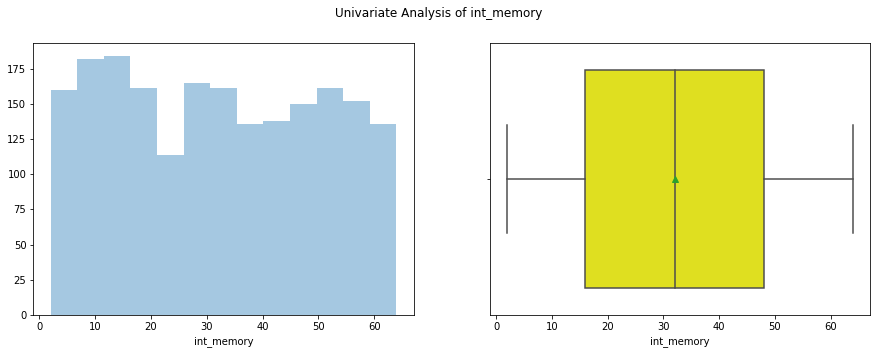

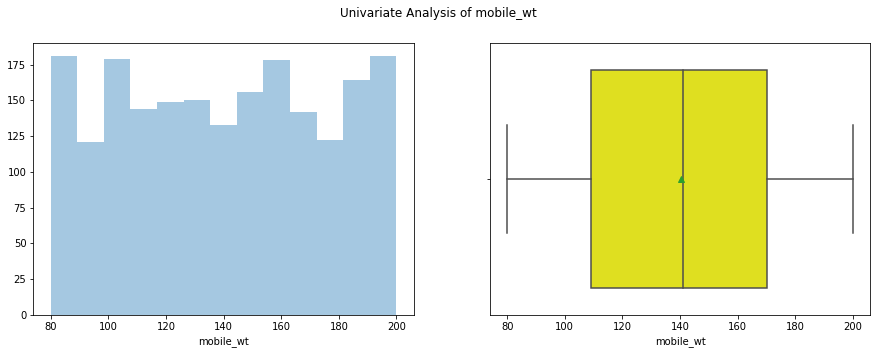

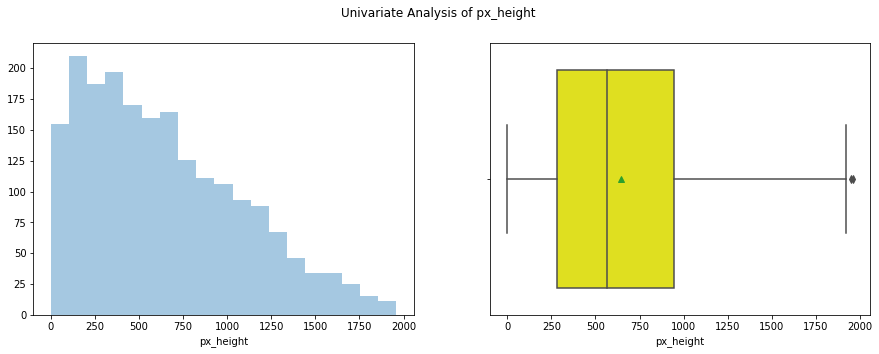

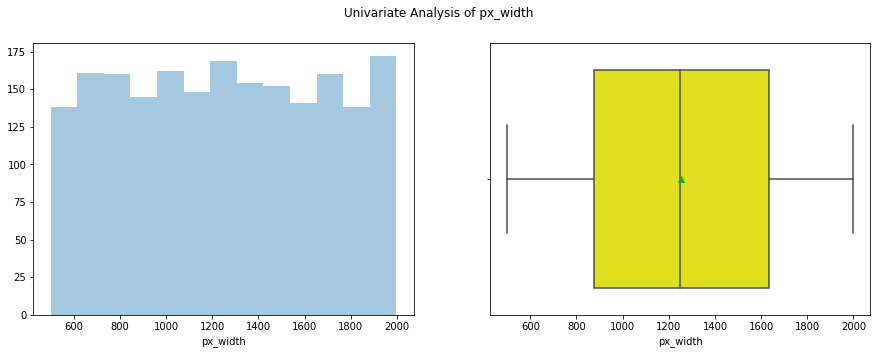

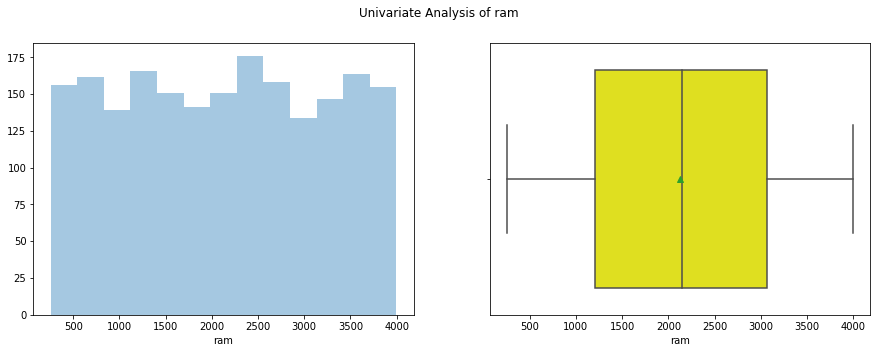

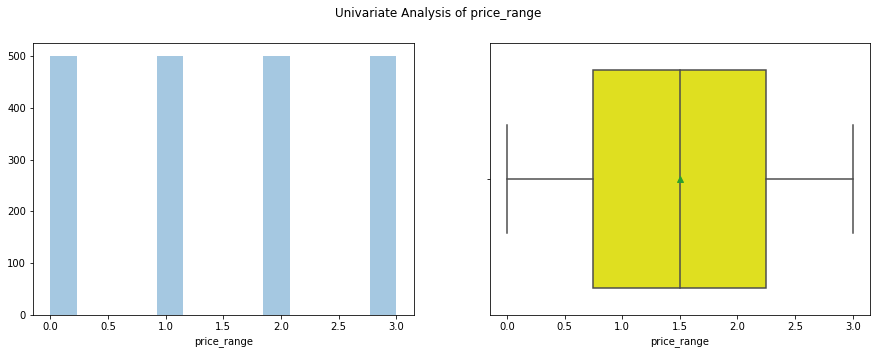

In [336]:
#checking if outlier are present in the final dataset 
x_axis=imp_data.columns.tolist()

for x in x_axis:
    fig, axes=plt.subplots(1,2, figsize=(15,5))
    sns.distplot(imp_data[x], ax=axes[0], kde=False)
    sns.boxplot(imp_data[x], ax=axes[1], showmeans=True, color='yellow')
    fig.suptitle('Univariate Analysis of '+x)
    
#no outlier present

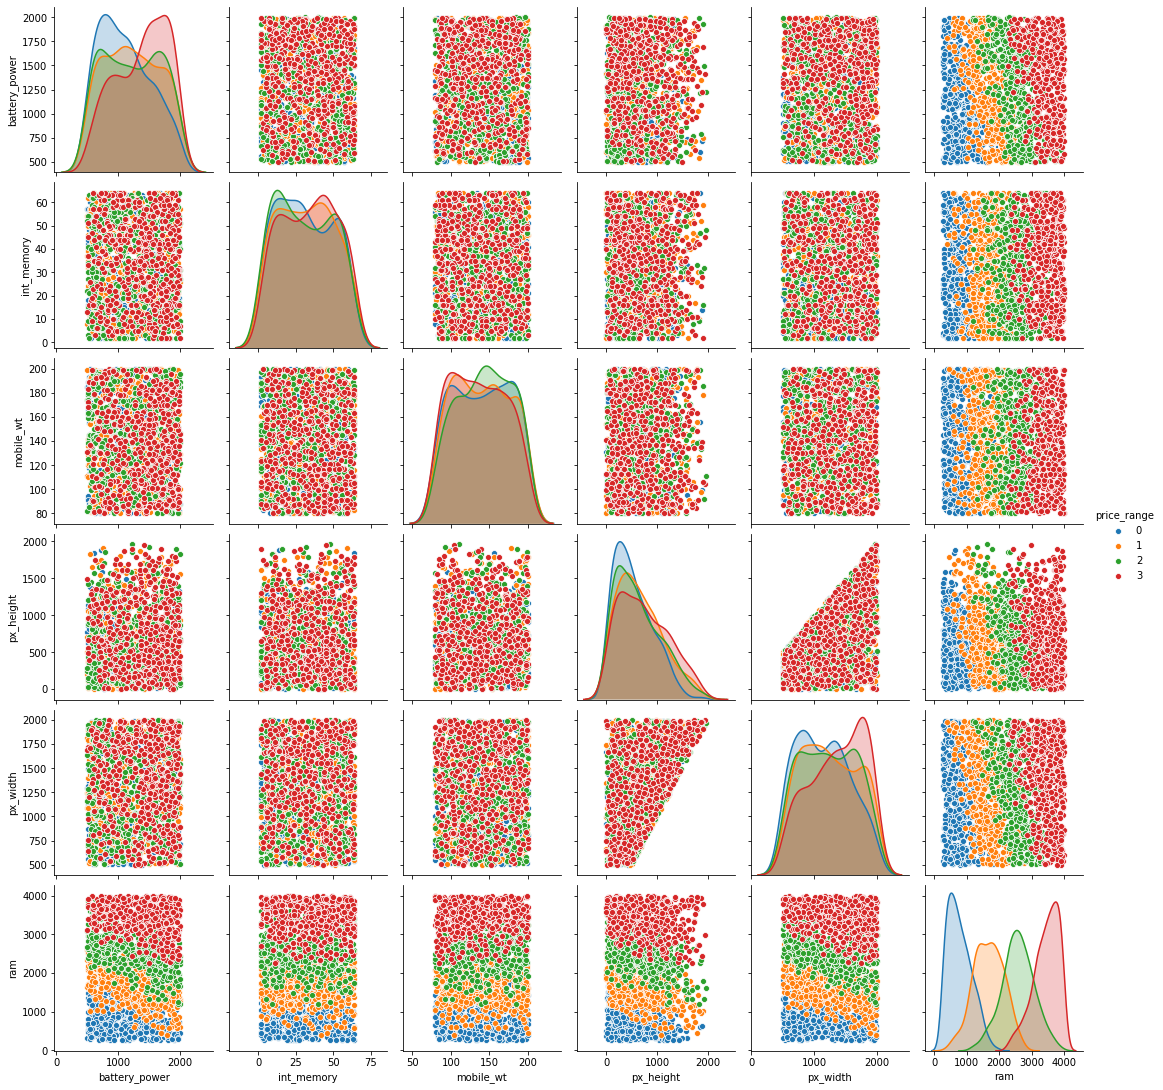

In [337]:
#to visualize the relationship of the variables with each other
sns.pairplot(imp_data, hue='price_range')
plt.show()

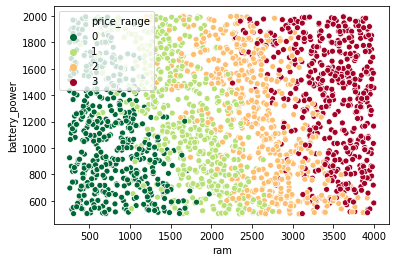

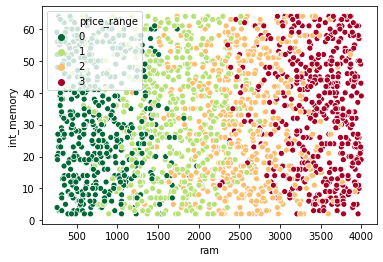

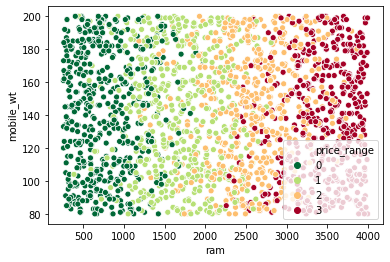

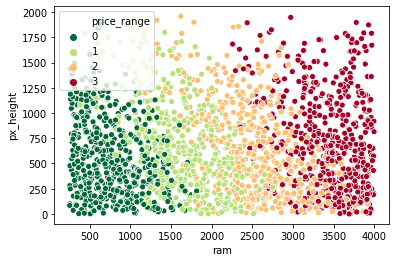

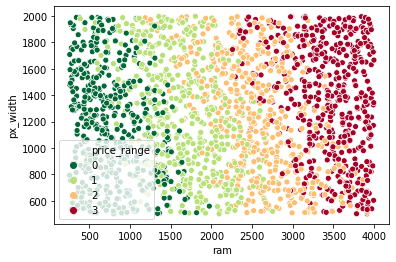

In [338]:
#relation of 'ram' with all other ind variables taking hue as 'price_range'
col=imp_data.drop(['ram', 'price_range'], axis=1).columns.tolist()
for y in col:
    sns.scatterplot(data=imp_data, x='ram', y=y, hue='price_range', palette='RdYlGn_r')
    plt.show()

### B) Model Building 
**1. Logistic Regression**

In [339]:
#with all features in orignal dataset
x=data.drop(['price_range'], axis=1)
y=data['price_range']

#spliting the dataset 
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [340]:
#predictions
y_train_prob=lr.predict_proba(x_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [341]:
#accuracy for training dataset
accuracy_score(y_train, y_train_pred)

0.644375

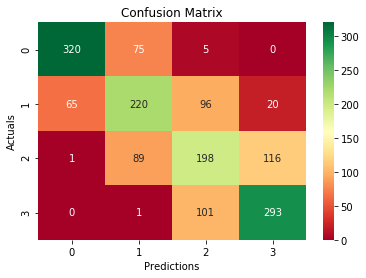

In [342]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, y_train_pred)
sns.heatmap(con_matrix, annot=True, cmap='RdYlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [343]:
#accuracy for testing dataset
accuracy_score(y_test, y_test_pred)

0.615

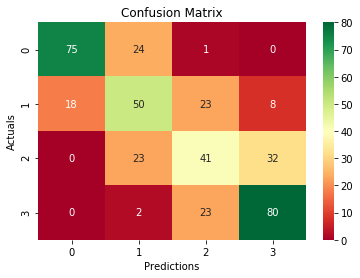

In [344]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_test, y_test_pred)
sns.heatmap(con_matrix, annot=True, cmap='RdYlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [345]:
#without binary features in orignal dataset
x=data.drop(['blue', 'dual_sim', 'three_g', 'four_g', 'touch_screen', 'wifi', 'price_range'], axis=1)
y=data['price_range']

#spliting the dataset 
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [346]:
#predictions
y_train_prob=lr.predict_proba(x_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [347]:
#accuracy for training dataset
accuracy_score(y_train, y_train_pred)

0.645625

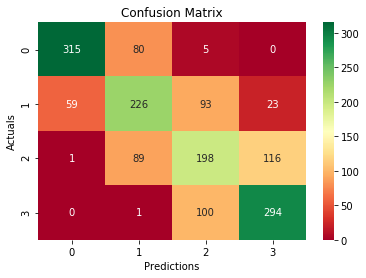

In [348]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, y_train_pred)
sns.heatmap(con_matrix, annot=True, cmap='RdYlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [349]:
#accuracy for testing dataset
accuracy_score(y_test, y_test_pred)

0.615

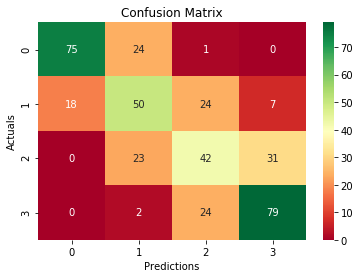

In [350]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_test, y_test_pred)
sns.heatmap(con_matrix, annot=True, cmap='RdYlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [351]:
#without binary features in orignal dataset
x=data.drop(['blue', 'dual_sim', 'three_g', 'four_g', 'touch_screen', 'wifi', 'price_range'], axis=1)
y=data['price_range']

#feature scaling
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x, columns=data.drop(['blue', 'dual_sim', 'three_g', 'four_g', 'touch_screen', 'wifi', 'price_range'], axis=1).columns.tolist())


#spliting the dataset 
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [352]:
#predictions
y_train_prob=lr.predict_proba(x_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [353]:
#accuracy for training dataset
accuracy_score(y_train, y_train_pred)

0.978125

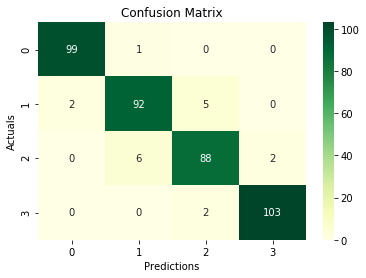

In [354]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_test, y_test_pred)
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [355]:
#accuracy for testing dataset
accuracy_score(y_test, y_test_pred)

0.955

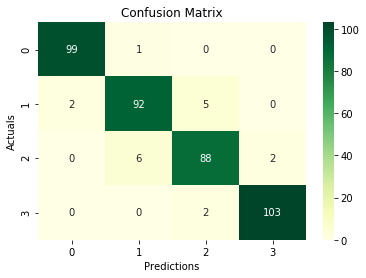

In [356]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_test, y_test_pred)
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [357]:
#with all features in important dataset
x=imp_data.drop(['price_range'], axis=1)
y=imp_data['price_range']

#spliting the dataset 
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [358]:
#predictions
y_train_prob=lr.predict_proba(x_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [359]:
#accuracy for training dataset
accuracy_score(y_train, y_train_pred)

0.6375

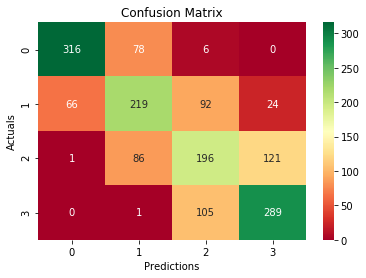

In [360]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, y_train_pred)
sns.heatmap(con_matrix, annot=True, cmap='RdYlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [361]:
#accuracy for testing dataset
accuracy_score(y_test, y_test_pred)

0.615

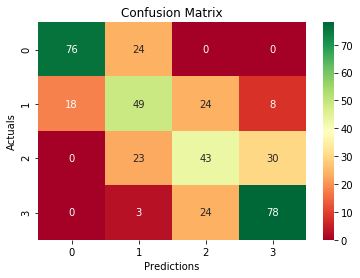

In [362]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_test, y_test_pred)
sns.heatmap(con_matrix, annot=True, cmap='RdYlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [363]:
#with all features in important dataset with feature scaling
x=imp_data.drop(['price_range'], axis=1)
y=imp_data['price_range']

#feature scaling
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x, columns=imp_data.drop(['price_range'], axis=1).columns.tolist())

#spliting the dataset 
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [364]:
#predictions
y_train_prob=lr.predict_proba(x_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [365]:
#accuracy for training dataset
accuracy_score(y_train, y_train_pred)

0.97875

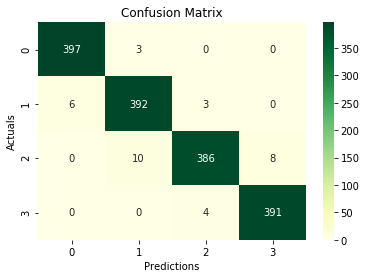

In [366]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, y_train_pred)
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [367]:
#accuracy for testing dataset
accuracy_score(y_test, y_test_pred)

0.9625

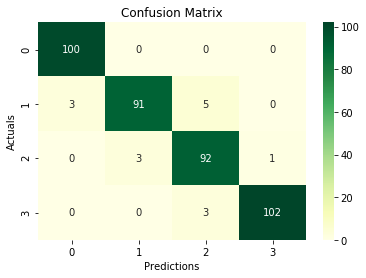

In [368]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_test, y_test_pred)
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [369]:
result_lr={
    'name':['All Features', 'All Features dropping binary','All Features dropping binary with scaling', 'imp features', 'imp features with scaling'], 'train_accuracy':[0.644375,0.645625,0.978125,0.6375,0.97875], 'test_accuracy':[0.615,0.615,0.955,0.615,0.9625]
}
result_lr=pd.DataFrame(result_lr)
result_lr[['train_accuracy', 'test_accuracy']]=result_lr[['train_accuracy', 'test_accuracy']]*100
result_lr
#All Features=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','blue','dual_sim','three_g','four_g','touch_screen','wifi']
#All Features dropping binary=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time',]
#imp features=['battery_power','int_memory','mobile_wt','px_height','px_width','ram']

,name,train_accuracy,test_accuracy
0,All Features,64.4375,61.50
1,All Features dropping binary,64.5625,61.50
2,All Features dropping binary with scaling,97.8125,95.50
3,imp features,63.7500,61.50
4,imp features with scaling,97.8750,96.25


**2. K-Nearest Neighbor**

In [370]:
#with all features in orignal dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [371]:
#Accuracy score of training dataset
knn.score(x_train, y_train)

0.963125

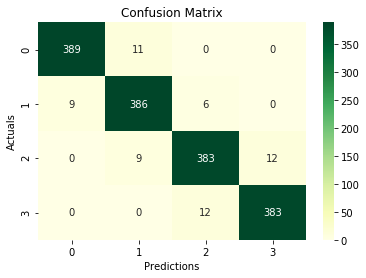

In [372]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, knn.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [373]:
#Accuracy score of testing dataset
knn.score(x_test, y_test)

0.92

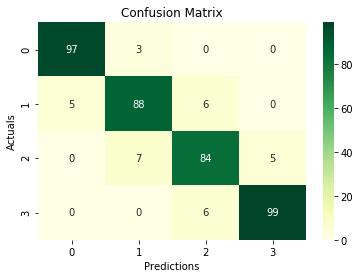

In [374]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [375]:
#with all features in orignal dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [376]:
#Accuracy score of training dataset
knn.score(x_train, y_train)

0.958125

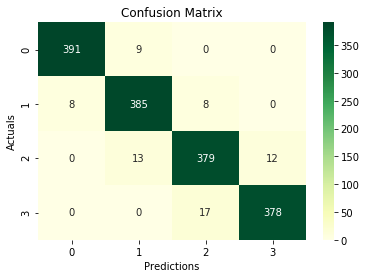

In [377]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, knn.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [378]:
#Accuracy score
knn.score(x_test, y_test)

0.9075

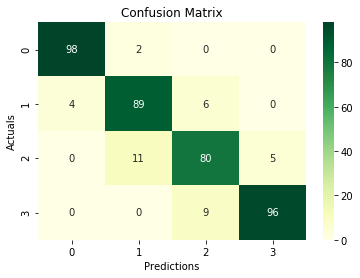

In [379]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [380]:
#with all features in orignal dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#Model
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [381]:
#Accuracy score of training dataset
knn.score(x_train, y_train)

0.951875

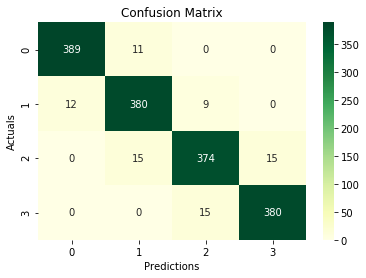

In [382]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, knn.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [383]:
#Accuracy score of testing dataset
knn.score(x_test, y_test)

0.9175

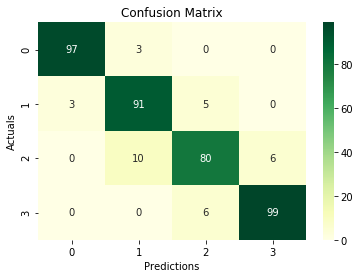

In [384]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [385]:
#with all features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#Model
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [386]:
#Accuracy score of training dataset
knn.score(x_train, y_train)

0.948125

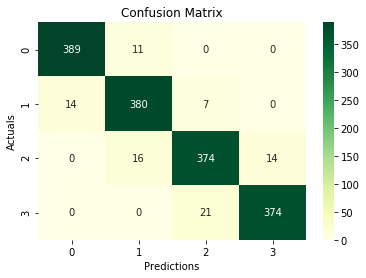

In [387]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, knn.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [388]:
#Accuracy score of testing dataset
knn.score(x_test, y_test)

0.9125

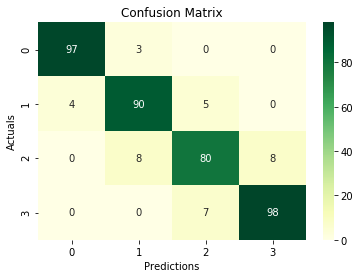

In [389]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [390]:
#with all features in original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [391]:
#Accuracy score of training dataset
knn.score(x_train, y_train)

0.954375

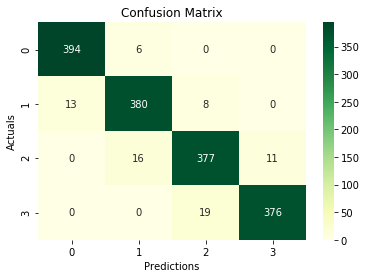

In [392]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, knn.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [393]:
#Accuracy score of testing dataset
knn.score(x_test, y_test)

0.92

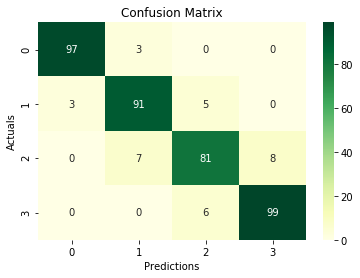

In [394]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [395]:
#with all features in original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#Model
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [396]:
#Accuracy score of training dataset
knn.score(x_train, y_train)

0.9525

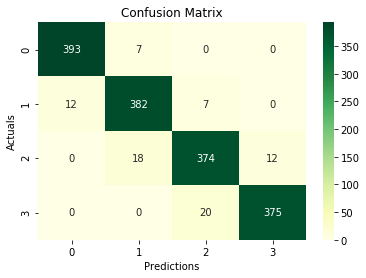

In [397]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, knn.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [398]:
#Accuracy score of testing dataset
knn.score(x_test, y_test)

0.93

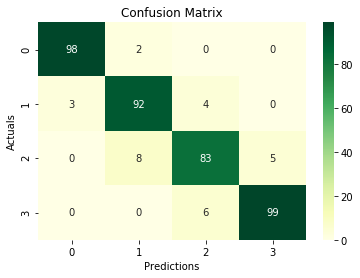

In [399]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [400]:
result_knn={'Nearest_neighbor':[3,5,7,9,11,13], 'train_accuracy':[0.963125,0.958125,0.951875,0.948125,0.954375,0.9525], 'test_accuracy':[0.92,0.9075,0.9175,0.9125,0.92,0.93]}
result_knn=pd.DataFrame(result_knn)
result_knn[['train_accuracy','test_accuracy']]=result_knn[['train_accuracy','test_accuracy']]*100
result_knn

,Nearest_neighbor,train_accuracy,test_accuracy
0,3,96.3125,92.00
1,5,95.8125,90.75
2,7,95.1875,91.75
3,9,94.8125,91.25
4,11,95.4375,92.00
5,13,95.2500,93.00


**3. Decision Tree**

In [401]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
dc=DecisionTreeClassifier(max_depth=1)
dc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [402]:
#Accuracy score of training dataset
dc.score(x_train, y_train)

0.496875

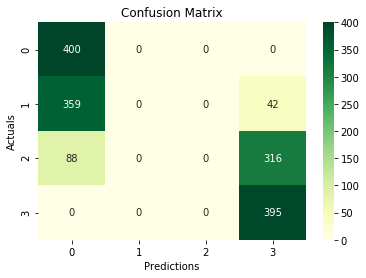

In [403]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, dc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [404]:
#Accuracy score of testing dataset
dc.score(x_test, y_test)

0.5125

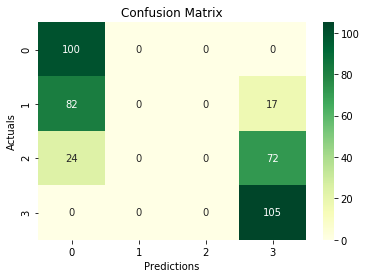

In [405]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, dc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

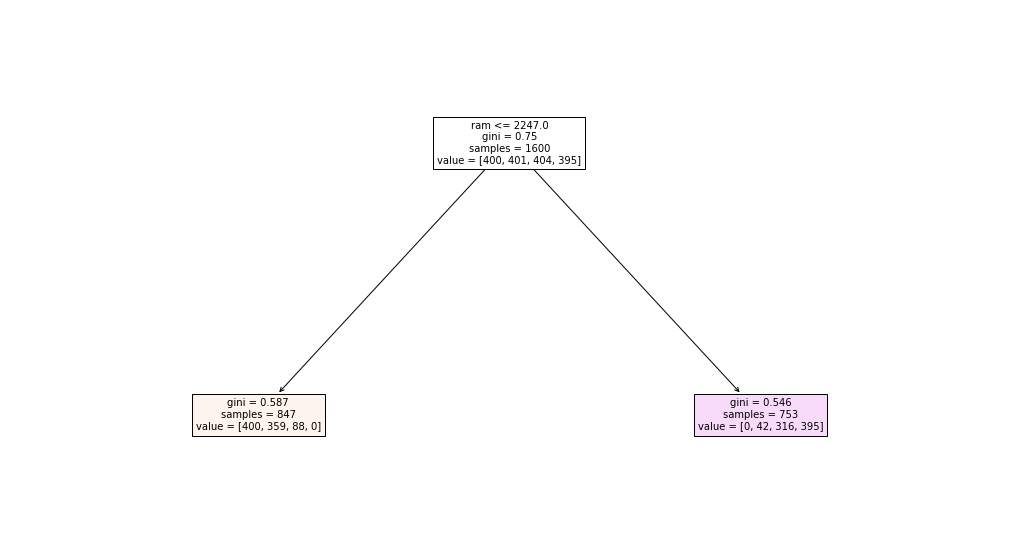

In [406]:
#Ploting decision tree with max_depth=1
plt.figure(figsize=(18,10))
plot_tree(dc, filled=True, fontsize=10, feature_names=x_train.columns.tolist())
plt.show()

In [407]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
dc=DecisionTreeClassifier(max_depth=2)
dc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [408]:
#Accuracy score of training dataset
dc.score(x_train, y_train)

0.769375

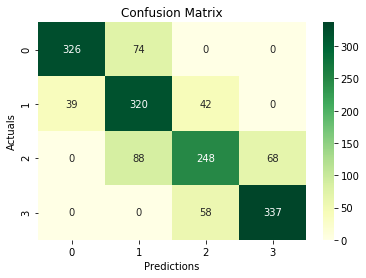

In [409]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, dc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [410]:
#Accuracy score of testing dataset
dc.score(x_test, y_test)

0.735

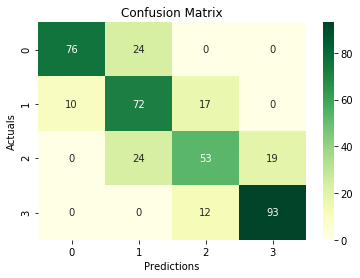

In [411]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, dc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

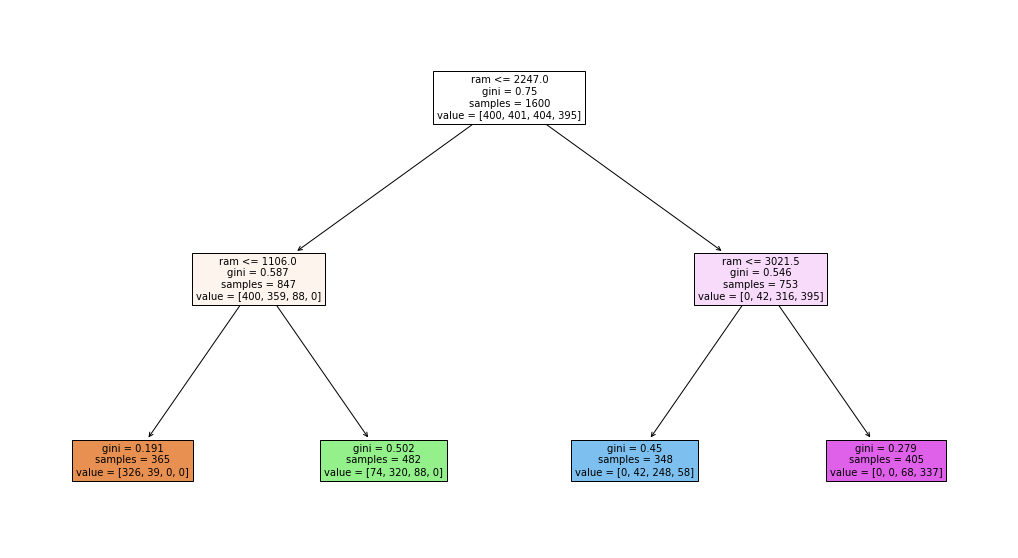

In [412]:
#Ploting decision tree with max_depth=2
plt.figure(figsize=(18,10))
plot_tree(dc, filled=True, fontsize=10, feature_names=x_train.columns.tolist())
plt.show()

In [413]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
dc=DecisionTreeClassifier(max_depth=3)
dc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [414]:
#Accuracy score of training dataset
dc.score(x_train, y_train)

0.773125

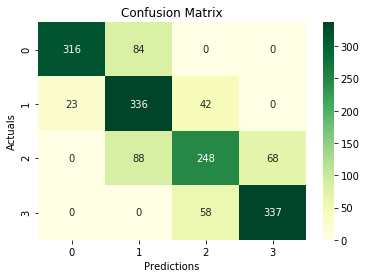

In [415]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, dc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [416]:
#Accuracy score of testing dataset
dc.score(x_test, y_test)

0.735

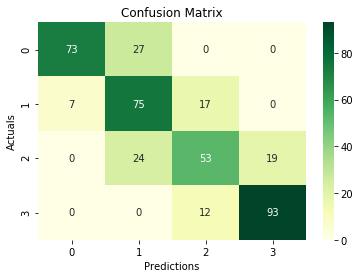

In [417]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, dc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

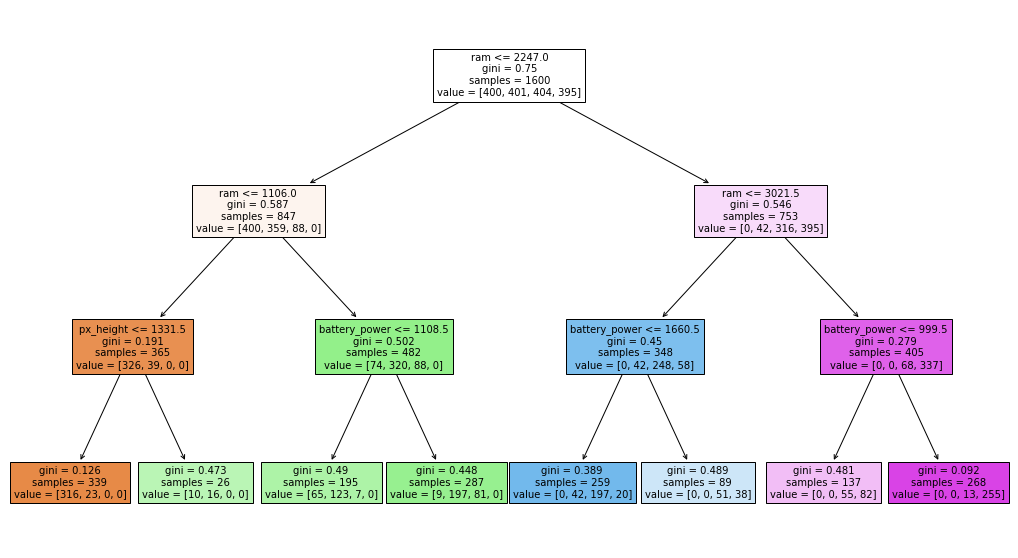

In [418]:
#Ploting decision tree with max_depth=3
plt.figure(figsize=(18,10))
plot_tree(dc, filled=True, fontsize=10, feature_names=x_train.columns.tolist())
plt.show()

In [419]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
dc=DecisionTreeClassifier(max_depth=4)
dc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [420]:
#Accuracy score of training dataset
dc.score(x_train, y_train)

0.843125

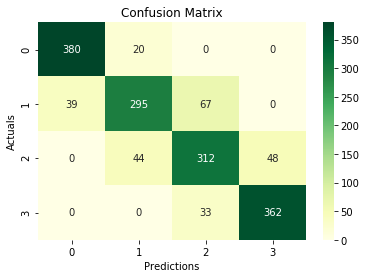

In [421]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, dc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [422]:
#Accuracy score of testing dataset
dc.score(x_test, y_test)

0.7975

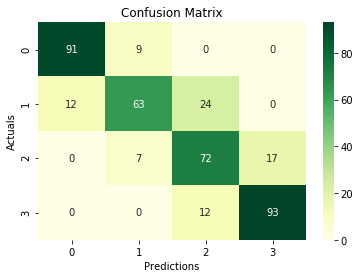

In [423]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, dc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

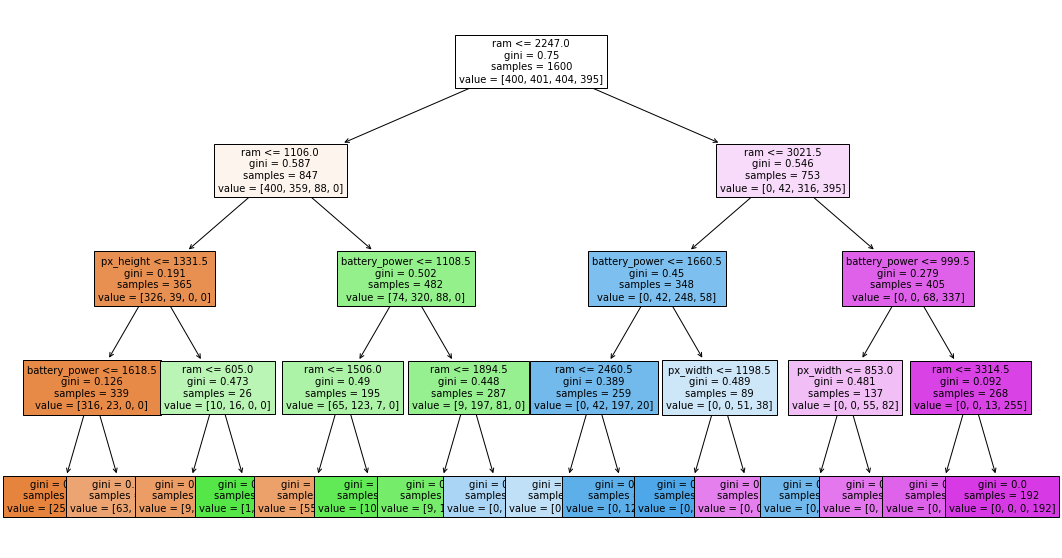

In [424]:
#Ploting decision tree with max_depth=4
plt.figure(figsize=(18,10))
plot_tree(dc, filled=True, fontsize=10, feature_names=x_train.columns.tolist())
plt.show()

In [425]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
dc=DecisionTreeClassifier(max_depth=5)
dc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [426]:
#Accuracy score of training dataset
dc.score(x_train, y_train)

0.8875

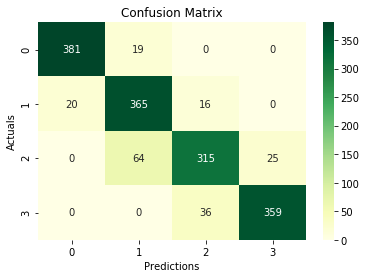

In [427]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, dc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [428]:
#Accuracy score of testing dataset
dc.score(x_test, y_test)

0.8

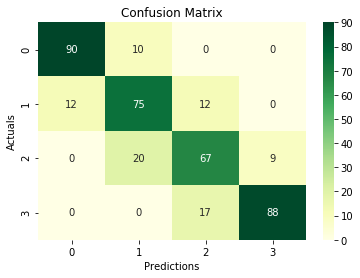

In [429]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, dc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

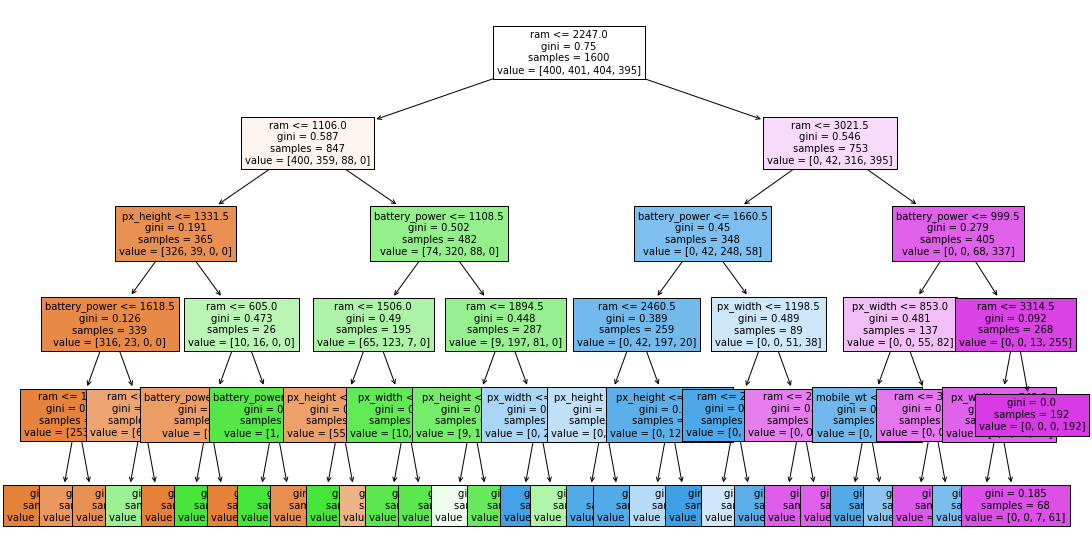

In [430]:
#Ploting decision tree with max_depth=5
plt.figure(figsize=(18,10))
plot_tree(dc, filled=True, fontsize=10, feature_names=x_train.columns.tolist())
plt.show()

In [431]:
result_dc={'max_depth':[1,2,3,4,5], 'train_accuracy':[0.496875,0.769375,0.773125,0.843125,0.8875], 'test_accuracy':[0.5125,0.735,0.735,0.7975,0.805]}
result_dc=pd.DataFrame(result_dc)
result_dc[['train_accuracy','test_accuracy']]=result_dc[['train_accuracy','test_accuracy']]*100
result_dc

,max_depth,train_accuracy,test_accuracy
0,1,49.6875,51.25
1,2,76.9375,73.50
2,3,77.3125,73.50
3,4,84.3125,79.75
4,5,88.7500,80.50


### overfiting occoured at max_depth=5..

**4. Random Forest**

In [432]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
rc=RandomForestClassifier(n_estimators=1000, max_depth=1,random_state=100)
rc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [433]:
#Accuracy of training dataset
rc.score(x_train, y_train)

0.61125

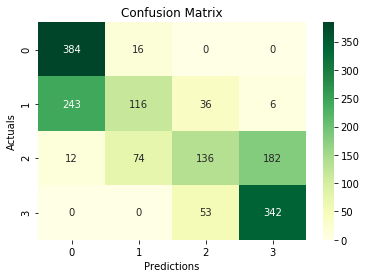

In [434]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, rc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [435]:
#Accuracy of testing dataset
rc.score(x_test, y_test)

0.58

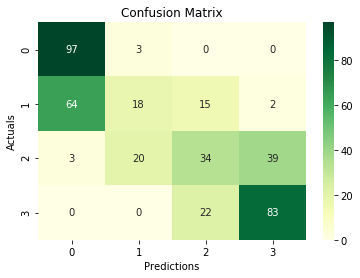

In [436]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, rc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [437]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
rc=RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=100)
rc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [438]:
#Accuracy of training dataset
rc.score(x_train, y_train)

0.803125

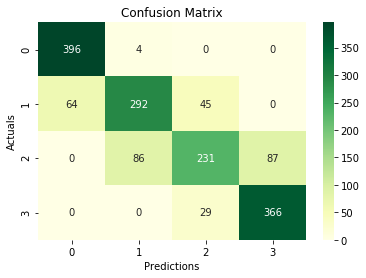

In [439]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, rc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [440]:
#Accuracy of testing dataset
rc.score(x_test, y_test)

0.73

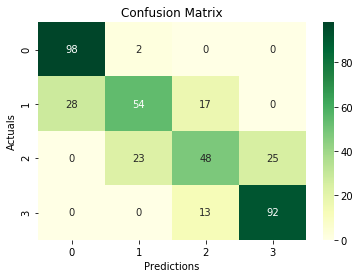

In [441]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, rc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [442]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
rc=RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=100)
rc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [443]:
#Accuracy of training dataset
rc.score(x_train, y_train)

0.860625

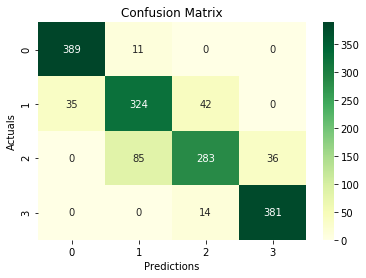

In [444]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, rc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [445]:
#Accuracy of testing dataset
rc.score(x_test, y_test)

0.765

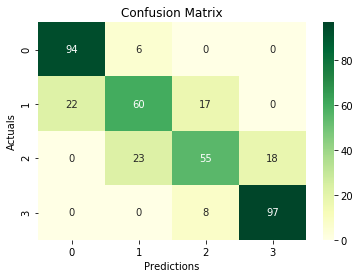

In [446]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, rc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [447]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
rc=RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=100)
rc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [448]:
#Accuracy of training dataset
rc.score(x_train, y_train)

0.8875

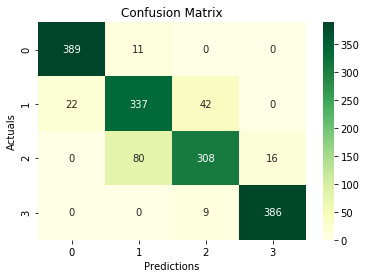

In [449]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, rc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [450]:
#Accuracy of testing dataset
rc.score(x_test, y_test)

0.805

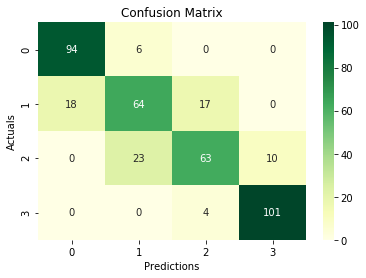

In [451]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, rc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [452]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
rc=RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=100)
rc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [453]:
#Accuracy of training dataset
rc.score(x_train, y_train)

0.9125

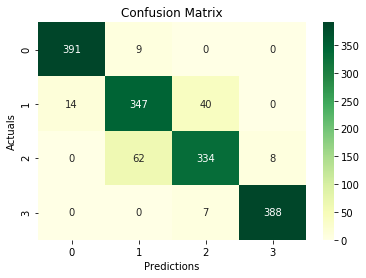

In [454]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, rc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [455]:
#Accuracy of testing dataset
rc.score(x_test, y_test)

0.825

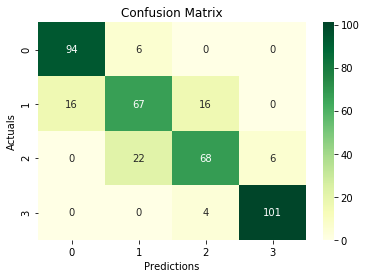

In [456]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, rc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [457]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
rc=RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=100)
rc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [458]:
#Accuracy of training dataset
rc.score(x_train, y_train)

0.948125

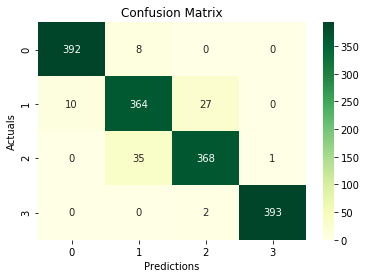

In [459]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, rc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [460]:
#Accuracy of testing dataset
rc.score(x_test, y_test)

0.84

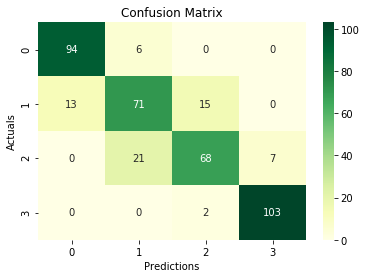

In [461]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, rc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [462]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
rc=RandomForestClassifier(n_estimators=1000, max_depth=7, random_state=100)
rc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [463]:
#Accuracy of training dataset
rc.score(x_train, y_train)

0.97625

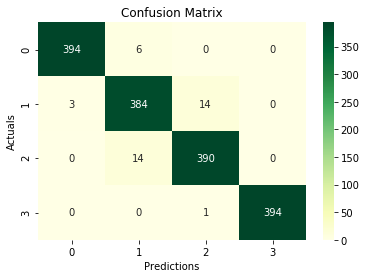

In [464]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, rc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [465]:
#Accuracy of testing dataset
rc.score(x_test, y_test)

0.855

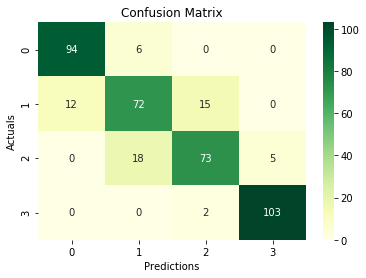

In [466]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, rc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [467]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
rc=RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=100)
rc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [468]:
#Accuracy of training dataset
rc.score(x_train, y_train)

0.990625

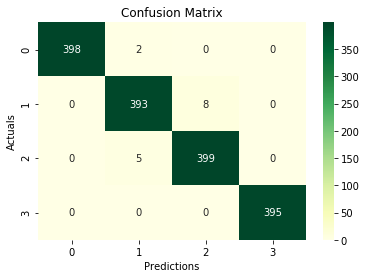

In [469]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, rc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [470]:
#Accuracy of testing dataset
rc.score(x_test, y_test)

0.8625

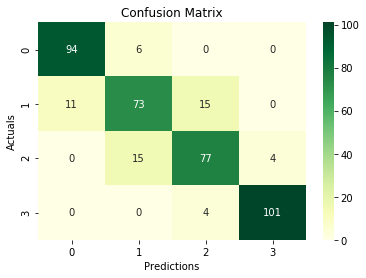

In [471]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, rc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [472]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
rc=RandomForestClassifier(n_estimators=1000, max_depth=9, random_state=100)
rc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [473]:
#Accuracy of training dataset
rc.score(x_train, y_train)

0.996875

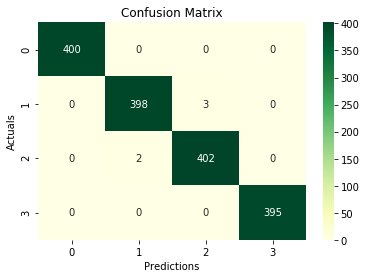

In [474]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, rc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [475]:
#Accuracy of testing dataset
rc.score(x_test, y_test)

0.875

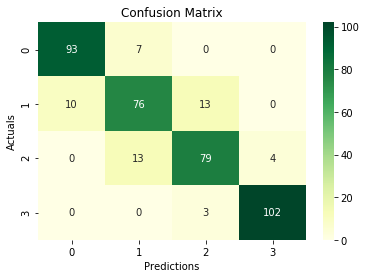

In [476]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, rc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [477]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
rc=RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=100)
rc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [478]:
#Accuracy of training dataset
rc.score(x_train, y_train)

1.0

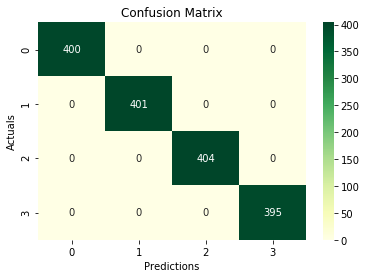

In [479]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, rc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [480]:
#Accuracy of testing dataset
rc.score(x_test, y_test)

0.88

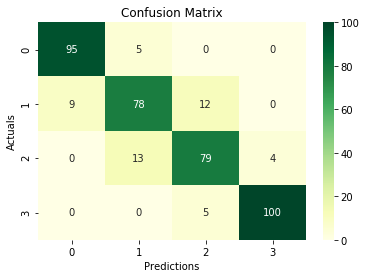

In [481]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, rc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [482]:
#with all the features in the original dataset
x=data.drop(['price_range'], axis=1)
y=data[['price_range']]

#spliting the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=100)

#model
rc=RandomForestClassifier(n_estimators=1000, random_state=100)
rc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [483]:
#Accuracy of training dataset
rc.score(x_train, y_train)

1.0

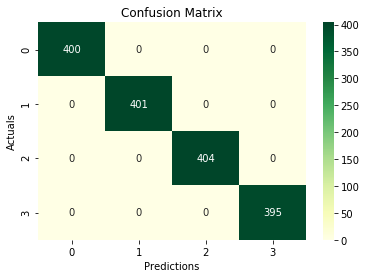

In [484]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(y_train, rc.predict(x_train))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [485]:
#Accuracy of testing dataset
rc.score(x_test, y_test)

0.88

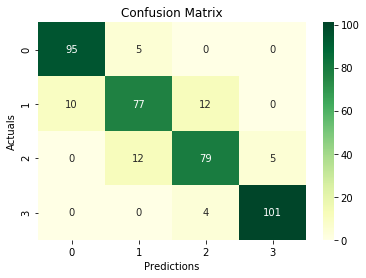

In [486]:
#confusion matrix on testing dataset
con_matrix=confusion_matrix(y_test, rc.predict(x_test))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [487]:
result_rc={'max_depth':[1,2,3,4,5,6,7,8,9,10,None], 'train_accuracy':[0.61125,0.803125,0.860625,0.8875,0.9125,0.948125,0.97625,0.990625,0.996875,1,1], 'test_accuracy':[0.58,0.73,0.765,0.805,0.825,0.84,0.855,0.8625,0.875,0.88,0.88]}
result_rc=pd.DataFrame(result_rc)
result_rc[['train_accuracy', 'test_accuracy']]=result_rc[['train_accuracy', 'test_accuracy']]*100

### C) Results 

In [488]:
#Logisitc Regression Results
#All Features=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','blue','dual_sim','three_g','four_g','touch_screen','wifi']
#All Features dropping binary=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time',]
#imp features=['battery_power','int_memory','mobile_wt','px_height','px_width','ram']


result_lr
#best result with features=['battery_power','int_memory','mobile_wt','px_height','px_width','ram']

,name,train_accuracy,test_accuracy
0,All Features,64.4375,61.50
1,All Features dropping binary,64.5625,61.50
2,All Features dropping binary with scaling,97.8125,95.50
3,imp features,63.7500,61.50
4,imp features with scaling,97.8750,96.25


In [489]:
#K-Nearest Neighbor Results
result_knn
#best result with Nearest_neighbor=3

,Nearest_neighbor,train_accuracy,test_accuracy
0,3,96.3125,92.00
1,5,95.8125,90.75
2,7,95.1875,91.75
3,9,94.8125,91.25
4,11,95.4375,92.00
5,13,95.2500,93.00


In [490]:
#Decision Tree Results
result_dc
#best result with max_depth=4
#overfitting with max_depth=5 and above

,max_depth,train_accuracy,test_accuracy
0,1,49.6875,51.25
1,2,76.9375,73.50
2,3,77.3125,73.50
3,4,84.3125,79.75
4,5,88.7500,80.50


In [491]:
#Random Forest Results
result_rc
##best result with max_depth=10 or None

,max_depth,train_accuracy,test_accuracy
0,1.0,61.1250,58.00
1,2.0,80.3125,73.00
2,3.0,86.0625,76.50
3,4.0,88.7500,80.50
4,5.0,91.2500,82.50
5,6.0,94.8125,84.00
6,7.0,97.6250,85.50
7,8.0,99.0625,86.25
8,9.0,99.6875,87.50
9,10.0,100.0000,88.00


#### In all models Logistic regression with features=['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram'] with feature scaling, gave the best results..i.e train_accuracy=97.8750,  test_accuracy=96.25....(train_size=0.8, random_state=100)